In [89]:
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [37]:
country = "United States"

df_country = df[df['job_country'] == country]

In [38]:
df_skill = df_country.explode('job_skills')

In [39]:
df_skill_count = df_skill.groupby(['job_skills','job_title_short']).size()

In [40]:
df_skill_count = df_skill_count.reset_index(name='skill_count')

In [41]:
df_skill_count.sort_values('skill_count',ascending=False,inplace=True)

In [42]:
df_skill_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [43]:
job_titles = df_skill_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

In [44]:
df_skill_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [45]:
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [65]:
df_job_title_count = df_country['job_title_short'].value_counts().reset_index(name='job_title_count')

In [68]:
df_skill_count_percetage = pd.merge(df_skill_count,df_job_title_count,on='job_title_short',how='left')

In [74]:
df_skill_count_percetage['skill_percentage'] = 100* (df_skill_count_percetage['skill_count'] / df_skill_count_percetage['job_title_count'])

In [75]:

df_skill_count_percetage

,job_skills,job_title_short,skill_count,job_title_count,skill_percentage
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


In [101]:
df_skill_count_percetage['skill_percentage']

0       72.036376
1       50.802171
2       51.052184
3       40.578919
4       44.232534
          ...    
1865     0.055127
1866     0.007724
1867     0.108578
1868     0.236407
1869     0.010765
Name: skill_percentage, Length: 1870, dtype: float64

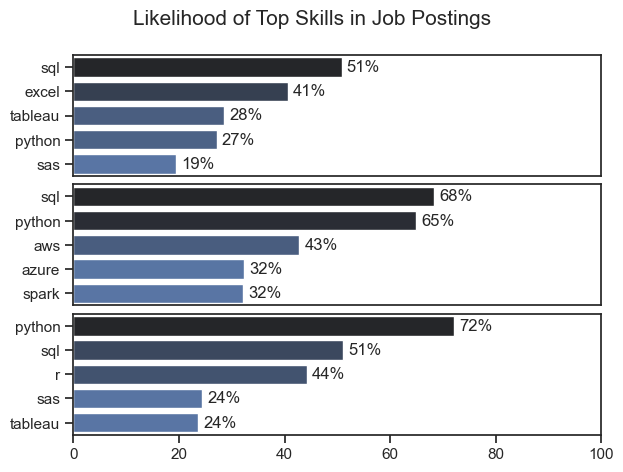

In [118]:
fig, ax = plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')
for x, title in enumerate(job_titles):
    df_plot = df_skill_count_percetage[df_skill_count_percetage['job_title_short'] == title].head(5)
    # print(df_plot)
    # df_plot.plot(kind='barh',x='job_skills',y='skill_percentage',ax=ax[x],title=title)
    sns.barplot(data=df_plot,x='skill_percentage',y='job_skills',hue='skill_percentage',palette='dark:b_r',ax=ax[x])
    ax[x].set_ylabel("")
    ax[x].set_xlabel("")
    ax[x].legend().set_visible(False)
    ax[x].set_xlim(0,100)
    for n, v in enumerate(df_plot['skill_percentage']):
        ax[x].text(v+1,n,f'{v:.0f}%', va='center')
    # ax[x].set_xticks()
    if x != (len(job_titles) - 1):
        ax[x].set_xticks([])
fig.suptitle('Likelihood of Top Skills in Job Postings', fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()
